# Assignment - 7

# Q1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values

for i in range(len(y)):
    if(y[i] == 'Iris-setosa'):
        y[i] = -1
    else:
        y[i] = 1
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0, test_size = 0.3)

In [25]:
import cvxpy as cp

In [26]:
def SVM_(X_train,y_train,X_test):
    
    w = cp.Variable((2, 1))
    b = cp.Variable()
    
    constraints = [cp.multiply(y_train, X_train @ w  + b) >= 1]
    prob = cp.Problem(cp.Minimize(0.5*cp.sum(w**2)), constraints)
    prob.solve()
    
    print("\nThe optimal value is", prob.value)
    print("A solution w is")
    print(w.value)
    print("A solution b is")
    print(b.value)
#     print("A dual solution is")
#     print(prob.constraints[0].dual_value)
    y_pred = []
    for i in X_test:
        if(( np.sum(i.reshape(-1, 1)*w.value) + b.value ) > 0):
            y_pred.append(1)
        else:
            y_pred.append(-1)

    y_pred = np.array(y_pred)
    return [w.value, b.value], y_pred

## i)

In [27]:
sv, y_pred = SVM_(X, y,X)


The optimal value is 12.499999999999988
A solution w is
[[9.14587482e-16]
 [5.00000000e+00]]
A solution b is
-4.000000000000002


In [28]:
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [29]:
from sklearn.metrics import accuracy_score
y_pred = []
for i in X_test:
    if(( np.sum(i.reshape(-1, 1)*sv[0]) + sv[-1] ) > 0):
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred = np.array(y_pred)
for i in range(len(y_test)):
    if(y_test[i] == -1):
        y_test[i] = 0



The optimal value is 12.499999999999988
A solution w is
[[9.14587482e-16]
 [5.00000000e+00]]
A solution b is
-4.000000000000002


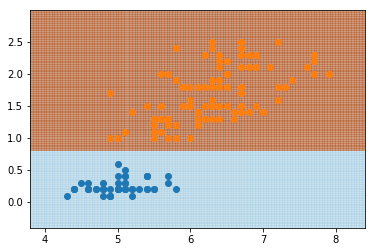

In [36]:
y = y.reshape(150,)

x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
sv, Z = SVM_(X, y.reshape(-1, 1), np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)


plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
# plt.savefig(str(i) + '.png')
# plt.show()

[43 57 60 62 67 79 81 93]


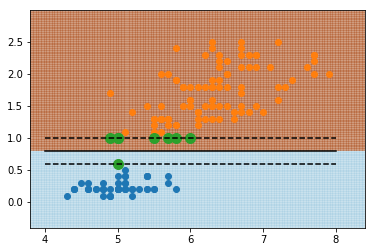

In [37]:
sup = []

for i in range(len(X)):
    num = sv[0][0]*X[i][0] + sv[0][1]*X[i][1] + sv[-1]
#     print(num)
    if(num >= -1 and num <= 1):
        sup.append(i)
sup1 = np.array(sup)  
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

print(sup1)
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
x1 = np.linspace(4, 8, 500)
x2 = -(sv[0][0]*x1 + sv[-1])/sv[0][1]
x3 = -(sv[0][0]*x1 + sv[-1] + 1)/sv[0][1]
x4 = -(sv[0][0]*x1 + sv[-1] - 1)/sv[0][1]
plt.plot(x1, x2, color = 'black')
plt.scatter(X[sup1][:, 0], X[sup1][:, 1], s = 100)
plt.plot(x1, x3, color = 'black', linestyle = '--')
plt.plot(x1, x4, color = 'black', linestyle = '--')


In [38]:
sup

[43, 57, 60, 62, 67, 79, 81, 93]

In [39]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values

for i in range(len(y)):
    if(y[i] == 'Iris-setosa'):
        y[i] = -1
    else:
        y[i] = 1
        
y=y.astype('int')
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X, y)
y_pred = clf.predict(X)

[ 5 15 16 23 31 43 57 60 62 67 79 81 93]


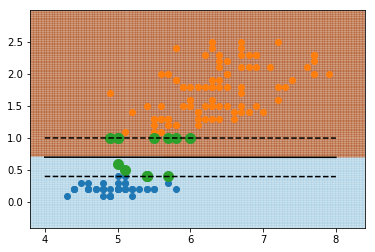

In [43]:
x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)


w = clf.coef_
b = clf.intercept_
sup = []
for i in range(len(X)):
    num = w[0][0]*X[i][0] + w[0][1]*X[i][1] + b
#     print(num)
    if(num >= -1 and num <= 1):
        sup.append(i)
sup = np.array(sup) 
print(sup)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
x1 = np.linspace(4, 8, 500)
x2 = -(w[0][0]*x1 + b)/w[0][1]
x3 = -(w[0][0]*x1 + b + 1)/w[0][1]
x4 = -(w[0][0]*x1 + b - 1)/w[0][1]
plt.scatter(X[sup][:, 0], X[sup][:, 1], s = 100)
plt.plot(x1, x2, color = 'black')
plt.plot(x1, x3, color = 'black', linestyle = '--')
plt.plot(x1, x4, color = 'black', linestyle = '--')



The optimal value is 12.500000241640054
A solution w is
[[-4.50343439e-08]
 [ 5.00000005e+00]]
A solution b is
-3.9999995220219846

The optimal value is 12.499999999999988
A solution w is
[[9.14587482e-16]
 [5.00000000e+00]]
A solution b is
-4.000000000000002


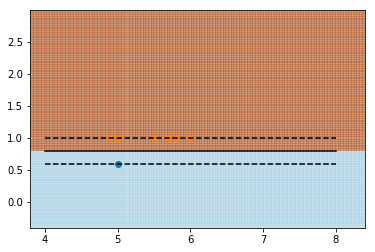

In [46]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values

for i in range(len(y)):
    if(y[i] == 'Iris-setosa'):
        y[i] = -1
    else:
        y[i] = 1
y = y.reshape(-1, 1)
sv, y_pred = SVM_(X[sup1], y[sup1],X[sup1])

y = y.reshape(150,)
x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
sv, Z = SVM_(X, y.reshape(-1, 1), np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

plt.scatter(X[sup1][:, 0][y[sup1]==-1], X[sup1][:, 1][y[sup1]==-1])
plt.scatter(X[sup1][:, 0][y[sup1]==1], X[sup1][:, 1][y[sup1]==1])
x1 = np.linspace(4, 8, 500)
x2 = -(sv[0][0]*x1 + sv[-1])/sv[0][1]
x3 = -(sv[0][0]*x1 + sv[-1] + 1)/sv[0][1]
x4 = -(sv[0][0]*x1 + sv[-1] - 1)/sv[0][1]
plt.plot(x1, x2, color = 'black')
# plt.scatter(X[sup1][:, 0], X[sup1][:, 1], s = 300)
plt.plot(x1, x3, color = 'black', linestyle = '--')
plt.plot(x1, x4, color = 'black', linestyle = '--')

# plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1])
# plt.scatter(X[:, 0][y==1], X[:, 1][y==1])


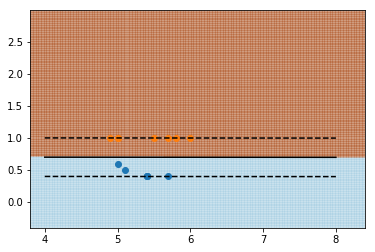

In [48]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values


for i in range(len(y)):
    if(y[i] == 'Iris-setosa'):
        y[i] = -1
    else:
        y[i] = 1
        
y=y.astype('int')
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X, y)
y_pred = clf.predict(X)

x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X[sup][:, 0][y[sup]==-1], X[sup][:, 1][y[sup]==-1])
plt.scatter(X[sup][:, 0][y[sup]==1], X[sup][:, 1][y[sup]==1])
x1 = np.linspace(4, 8, 500)
x2 = -(w[0][0]*x1 + b)/w[0][1]
x3 = -(w[0][0]*x1 + b + 1)/w[0][1]
x4 = -(w[0][0]*x1 + b - 1)/w[0][1]
# plt.scatter(X[sup][:, 0], X[sup][:, 1], s = 100)
plt.plot(x1, x2, color = 'black')
plt.plot(x1, x3, color = 'black', linestyle = '--')
plt.plot(x1, x4, color = 'black', linestyle = '--')

# Q2)

In [173]:
def SVM_p(X_train,y_train,X_test, lambd):
    
    w = cp.Variable((2, 1))
    b = cp.Variable()
    
#     constraints = []
    loss = (0.5*cp.sum(w**2)) + lambd * (cp.sum(cp.pos(1 - cp.multiply(y_train, X_train @ w  + b))))
    prob = cp.Problem(cp.Minimize(loss), [])
    prob.solve()
    
    print("\nThe optimal value is", prob.value)
    print("A solution w is")
    print(w.value)
    print("A solution b is")
    print(b.value)
#     print("A dual solution is")
#     print(prob.constraints[0].dual_value)
    y_pred = []
    for i in X_test:
        if(( np.sum(i.reshape(-1, 1)*w.value) + b.value ) > 0):
            y_pred.append(1)
        else:
            y_pred.append(-1)

    y_pred = np.array(y_pred)
    return [w.value, b.value], y_pred

In [174]:
sv, y_pred = SVM_p(X, y.reshape(-1, 1),X, 100)


The optimal value is 12.479850451637283
A solution w is
[[7.25330627e-06]
 [5.00254451e+00]]
A solution b is
-4.002436555717399



The optimal value is 12.479850451637283
A solution w is
[[7.25330627e-06]
 [5.00254451e+00]]
A solution b is
-4.002436555717399


0

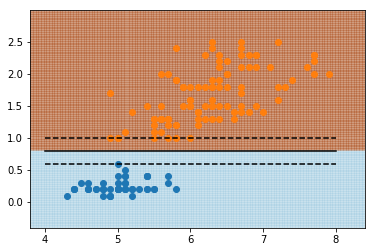

In [176]:
sup = []

for i in range(len(X)):
    num = sv[0][0]*X[i][0] + sv[0][1]*X[i][1] + sv[-1]
#     print(num)
    if(num >= -1 and num <= 1):
        sup.append(i)
sup1 = np.array(sup)  
x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
sv, Z = SVM_p(X, y.reshape(-1, 1), np.c_[xx.ravel(), yy.ravel()], 100)

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
x1 = np.linspace(4, 8, 500)
x2 = -(sv[0][0]*x1 + sv[-1])/sv[0][1]
x3 = -(sv[0][0]*x1 + sv[-1] + 1)/sv[0][1]
x4 = -(sv[0][0]*x1 + sv[-1] - 1)/sv[0][1]
plt.plot(x1, x2, color = 'black')
# plt.scatter(X[sup1][:, 0], X[sup1][:, 1], s = 100)
plt.plot(x1, x3, color = 'black', linestyle = '--')
plt.plot(x1, x4, color = 'black', linestyle = '--')


## iv)

gamma =  8.0


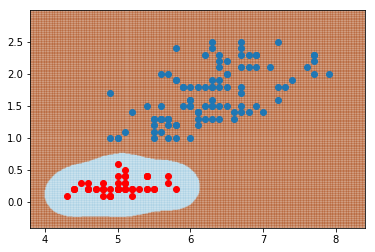

gamma =  3.840186747419173


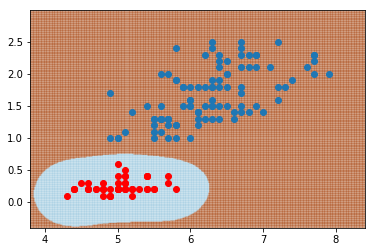

gamma =  1.8433792818817307


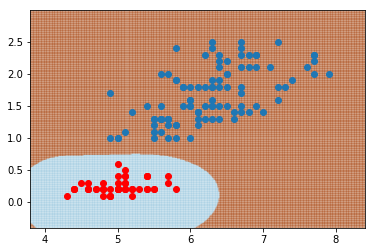

gamma =  0.8848650860936617


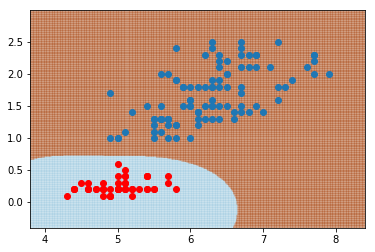

gamma =  0.4247558971088507


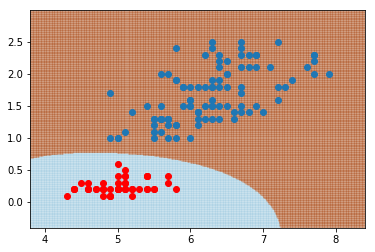

gamma =  0.2038927458706938


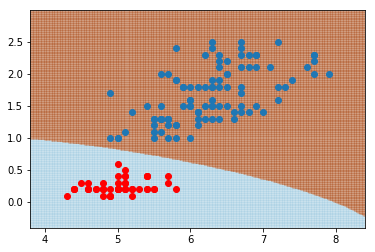

gamma =  0.0978732775734429


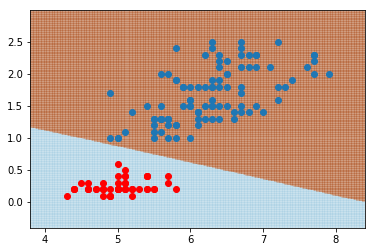

gamma =  0.04698145793300171


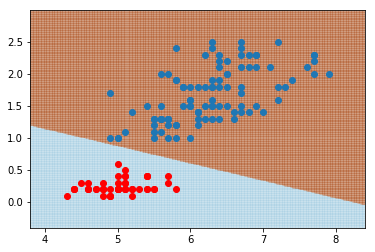

gamma =  0.022552196516093068


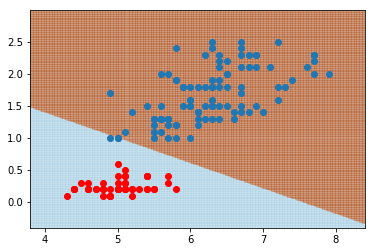

gamma =  0.01082558077328668


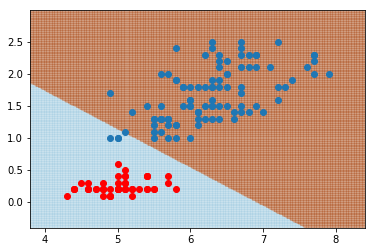

gamma =  0.005196531477336415


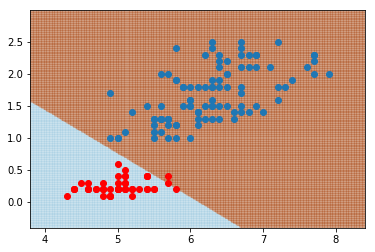

gamma =  0.002494456413976735


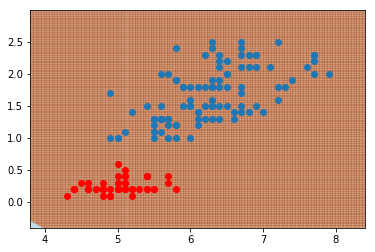

gamma =  0.0011973973078710253


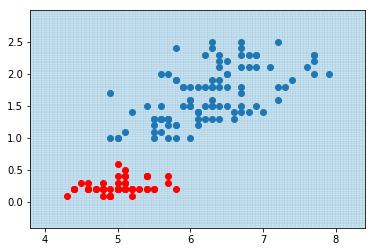

gamma =  0.0005747786591352134


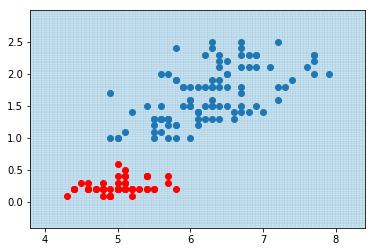

gamma =  0.0002759071736888011


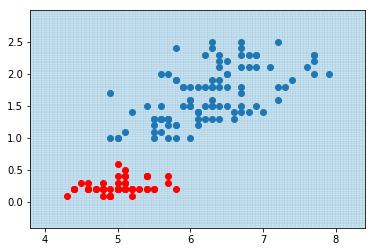

gamma =  0.00013244188398970177


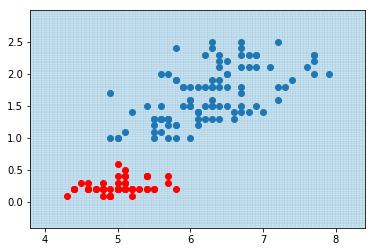

gamma =  6.357519596256004e-05


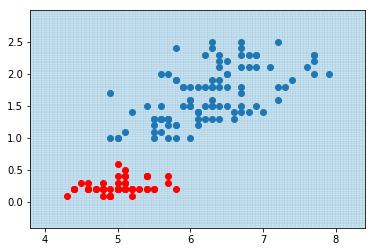

gamma =  3.0517578125e-05


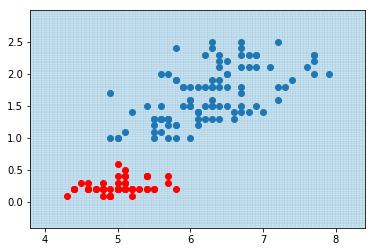

In [78]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values

# c = np.array([2**n for n in np.linspace(-5, 15, 10)])
g = np.array([2**n for n in np.linspace(3, -15, 18)])

for i in range(len(y)):
    if(y[i] == 'Iris-setosa'):
        y[i] = -1
    else:
        y[i] = 1
        
y=y.astype('int')
from sklearn.svm import SVC


for i in g:
    print('gamma = ', i)
    clf = SVC(kernel = 'rbf', gamma = i)
    clf.fit(X, y)
    y_pred = clf.predict(X)

    x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
    y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1], color = 'r')
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
    plt.show()
# x1 = np.linspace(4, 8, 500)
# x2 = -(w[0][0]*x1 + b)/w[0][1]
# x3 = -(w[0][0]*x1 + b + 1)/w[0][1]
# x4 = -(w[0][0]*x1 + b - 1)/w[0][1]
# # plt.scatter(X[sup][:, 0], X[sup][:, 1], s = 100)
# plt.plot(x1, x2, color = 'black')
# plt.plot(x1, x3, color = 'black', linestyle = '--')
# plt.plot(x1, x4, color = 'black', linestyle = '--')

degree =  1


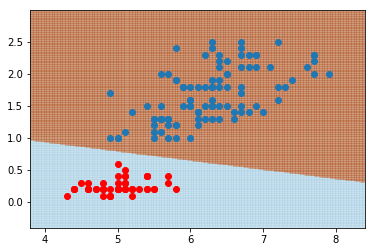

degree =  2


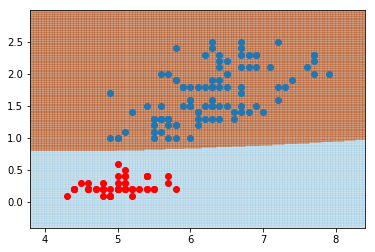

degree =  3


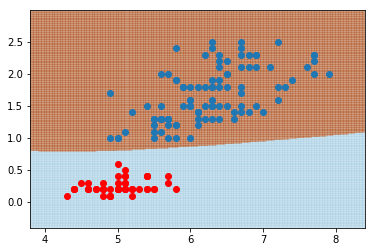

degree =  4


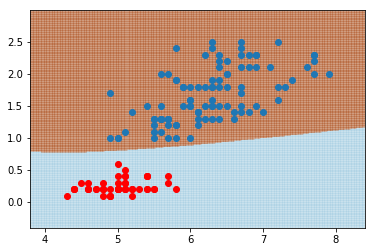

degree =  5


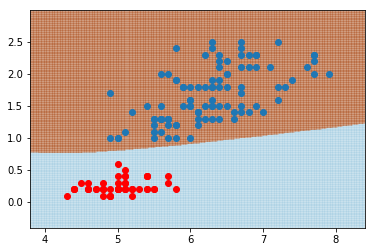

degree =  6


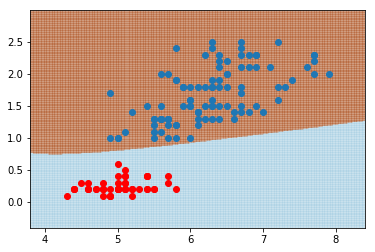

degree =  7


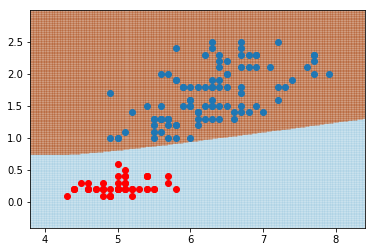

degree =  8


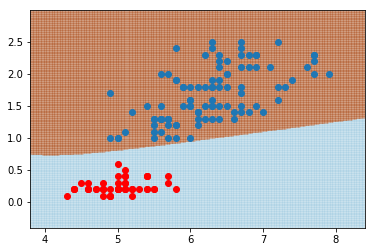

degree =  9


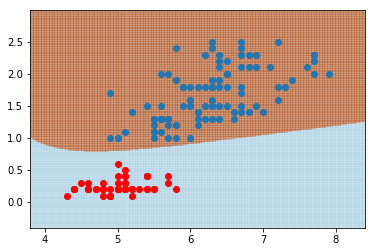

degree =  10


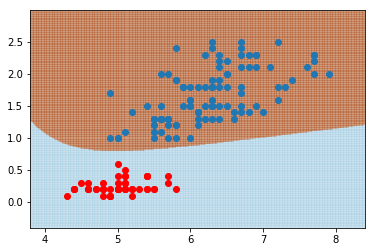

degree =  11


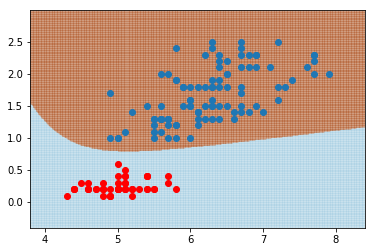

degree =  12


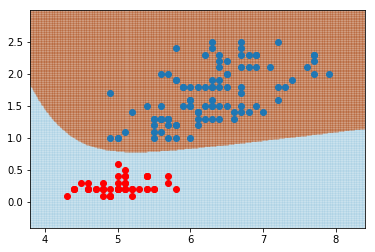

degree =  13


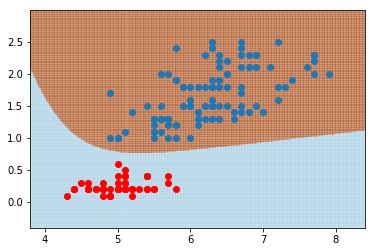

degree =  14


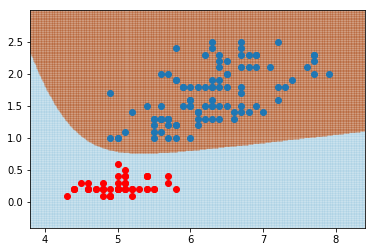

degree =  15


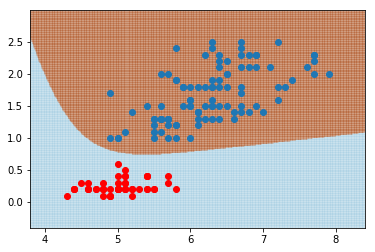

degree =  16


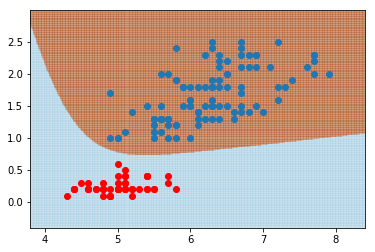

degree =  17


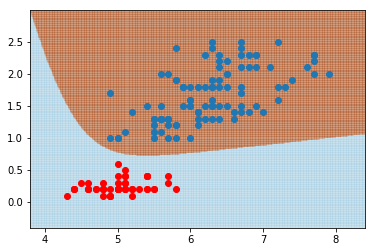

degree =  18


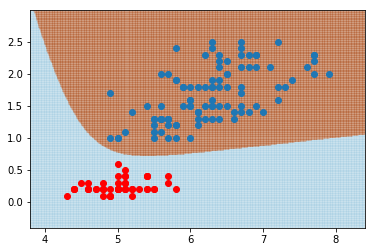

degree =  19


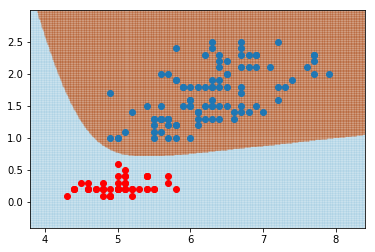

degree =  20


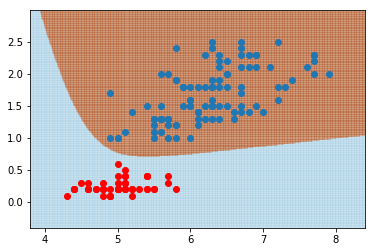

degree =  21


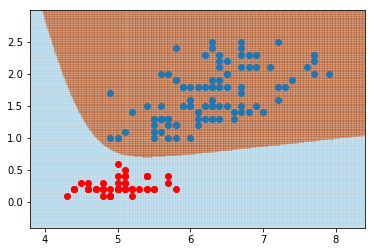

degree =  22


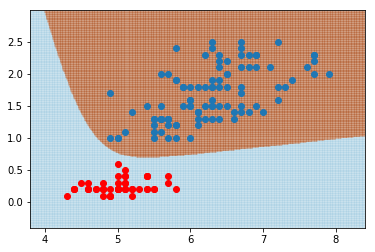

degree =  23


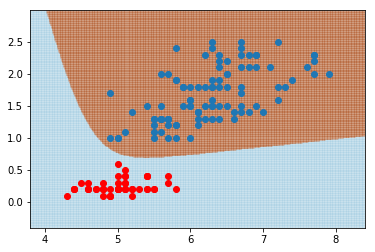

degree =  24


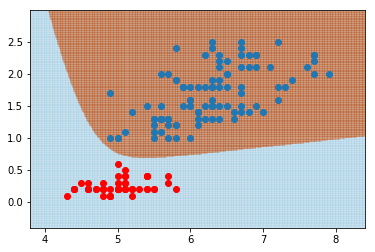

degree =  25


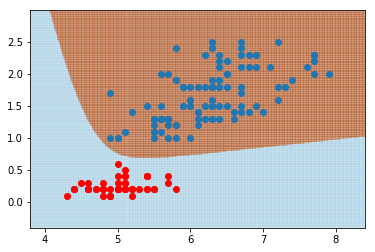

degree =  26


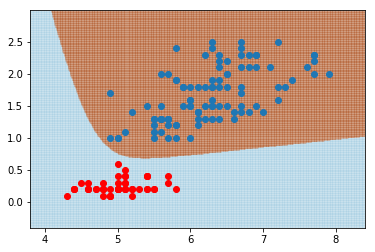

degree =  27


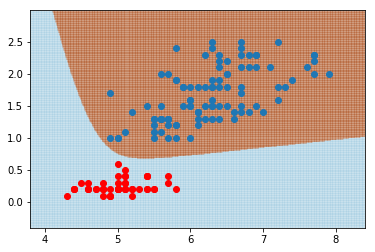

degree =  28


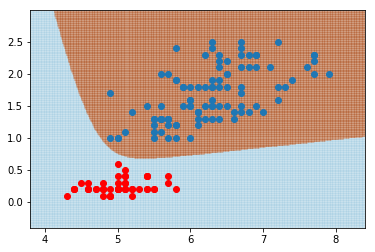

In [82]:

import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
X = data.iloc[:, [0, 3]].values
y = data.iloc[:, -1].values

# c = np.array([2**n for n in np.linspace(-5, 15, 10)])
g = list(range(1, 29))

for i in range(len(y)):
    if(y[i] == 'Iris-setosa'):
        y[i] = -1
    else:
        y[i] = 1
        
y=y.astype('int')
from sklearn.svm import SVC


for i in g:
    print('degree = ', i)
    clf = SVC(kernel = 'poly', degree = i)
    clf.fit(X, y)
    y_pred = clf.predict(X)

    x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
    y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1], color = 'r')
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
    plt.show()
# x1 = np.linspace(4, 8, 500)
# x2 = -(w[0][0]*x1 + b)/w[0][1]
# x3 = -(w[0][0]*x1 + b + 1)/w[0][1]
# x4 = -(w[0][0]*x1 + b - 1)/w[0][1]
# # plt.scatter(X[sup][:, 0], X[sup][:, 1], s = 100)
# plt.plot(x1, x2, color = 'black')
# plt.plot(x1, x3, color = 'black', linestyle = '--')
# plt.plot(x1, x4, color = 'black', linestyle = '--')

In [165]:
import autograd.numpy as np
    
from autograd import grad

def SVM_autograd(X, y, l, alpha = 0.01):
    
    def error(w):
        e = 1 - (y * (X[:, 0]*w[0] + X[:, 1]*w[1] + b))
#         y - np.dot(X, w)
        
        return ((0.5*np.sum(w**2)) + (np.sum(e)*l))
        
    w = np.zeros(2)
    print(w)
    b = np.array([0])
    
    for i in range(1000):
        w = w - alpha*grad(error)(w)
#         b = b - alpha*grad(error)(b)
        
    print (error(w))
    
    return [w, b]

In [166]:
sv = SVM_autograd(X, y, 100, alpha = 0.00001)
sv

[0. 0.]
-16365725.624244746


[array([374.02861018, 154.62635281]), array([0])]

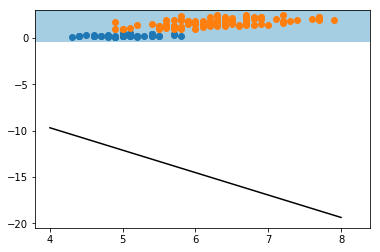

In [135]:
# sup = []

# for i in range(len(X)):
#     num = sv[0][0]*X[i][0] + sv[0][1]*X[i][1] + sv[-1]
# #     print(num)
#     if(num >= -1 and num <= 1):
#         sup.append(i)
# sup1 = np.array(sup)  
import numpy as np
y = y.reshape(150,)

x_min, x_max = min(X[:, 0]) - .5, max(X[:, 0]) + .5
y_min, y_max = min(X[:, 1]) - .5, max(X[:, 1]) + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = []
for i in np.c_[xx.ravel(), yy.ravel()]:
    if(( np.sum(i.reshape(-1, 1)*sv[0]) + sv[-1] ) > 0):
        Z.append(1)
    else:
        Z.append(-1)

Z = np.array(Z)
# sv, Z = SVM_(X, y.reshape(-1, 1), np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)


# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

# print(sup1)
plt.scatter(X[:, 0][y==-1], X[:, 1][y==-1])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
x1 = np.linspace(4, 8, 500)
x2 = -(sv[0][0]*x1 + sv[-1])/sv[0][1]
x3 = -(sv[0][0]*x1 + sv[-1] + 1)/sv[0][1]
x4 = -(sv[0][0]*x1 + sv[-1] - 1)/sv[0][1]
plt.plot(x1, x2, color = 'black')
# plt.scatter(X[sup1][:, 0], X[sup1][:, 1], s = 100)
# plt.plot(x1, x3, color = 'black', linestyle = '--')
# plt.plot(x1, x4, color = 'black', linestyle = '--')

It is not possible to write a function using autograd